# Creating Clear Images: Alternatives to Random Noise

This notebook demonstrates various methods to create clear, structured images instead of using `np.random.rand()` which generates noisy images.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

# Set up plotting style
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)

## 1. Geometric Shapes

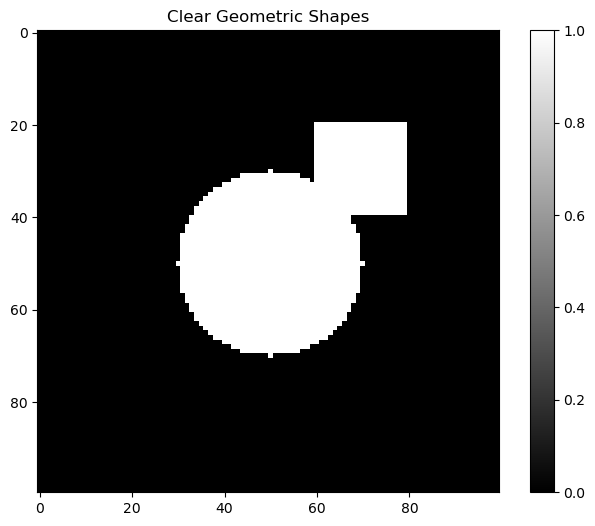

In [2]:
# Create a clear image with geometric shapes
image = np.zeros((100, 100))

# Add a white circle in the center
y, x = np.ogrid[:100, :100]
center_y, center_x = 50, 50
radius = 20
circle = (x - center_x)**2 + (y - center_y)**2 <= radius**2
image[circle] = 1.0

# Add a white rectangle
image[20:40, 60:80] = 1.0

plt.figure(figsize=(8, 6))
plt.imshow(image, cmap='gray')
plt.title('Clear Geometric Shapes')
plt.colorbar()
plt.show()

## 2. Gradient Images

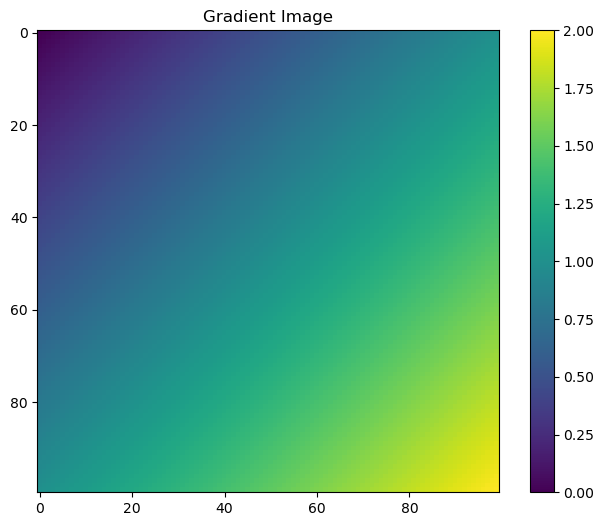

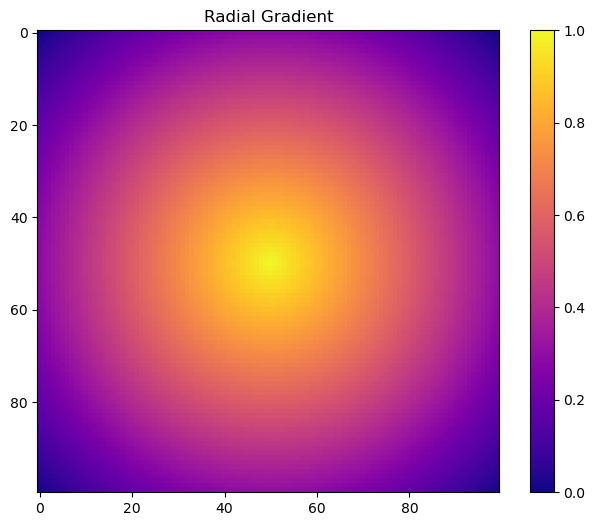

In [3]:
# Create a gradient image
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)
image = X + Y  # Linear gradient

plt.figure(figsize=(8, 6))
plt.imshow(image, cmap='viridis')
plt.title('Gradient Image')
plt.colorbar()
plt.show()

# Radial gradient
center_y, center_x = 50, 50
y, x = np.ogrid[:100, :100]
distance = np.sqrt((x - center_x)**2 + (y - center_y)**2)
radial_gradient = 1 - distance / np.max(distance)

plt.figure(figsize=(8, 6))
plt.imshow(radial_gradient, cmap='plasma')
plt.title('Radial Gradient')
plt.colorbar()
plt.show()

## 3. Checkerboard Pattern

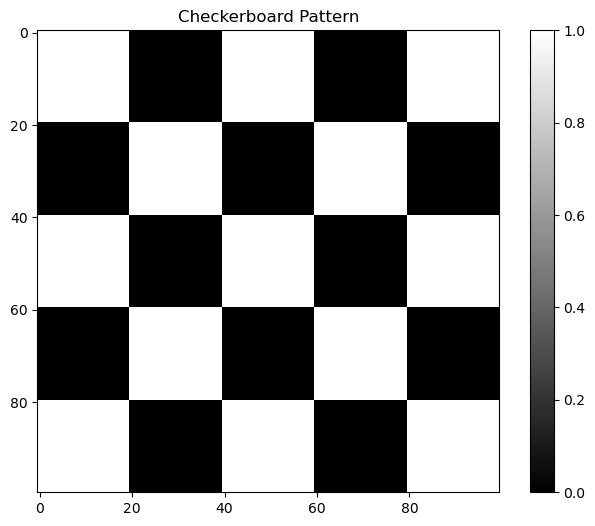

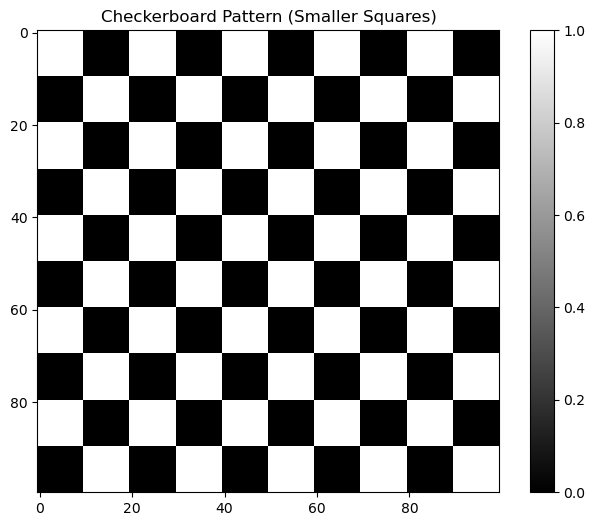

In [4]:
# Create a checkerboard pattern
image = np.zeros((100, 100))
for i in range(0, 100, 20):
    for j in range(0, 100, 20):
        if (i + j) % 40 == 0:
            image[i:i+20, j:j+20] = 1.0

plt.figure(figsize=(8, 6))
plt.imshow(image, cmap='gray')
plt.title('Checkerboard Pattern')
plt.colorbar()
plt.show()

# Alternative: Using numpy operations for cleaner code
def create_checkerboard(size, square_size):
    """Create a checkerboard pattern using numpy operations"""
    pattern = np.zeros((size, size))
    for i in range(0, size, square_size):
        for j in range(0, size, square_size):
            if (i + j) % (2 * square_size) == 0:
                pattern[i:i+square_size, j:j+square_size] = 1.0
    return pattern

checkerboard = create_checkerboard(100, 10)
plt.figure(figsize=(8, 6))
plt.imshow(checkerboard, cmap='gray')
plt.title('Checkerboard Pattern (Smaller Squares)')
plt.colorbar()
plt.show()

## 4. Text or Letters

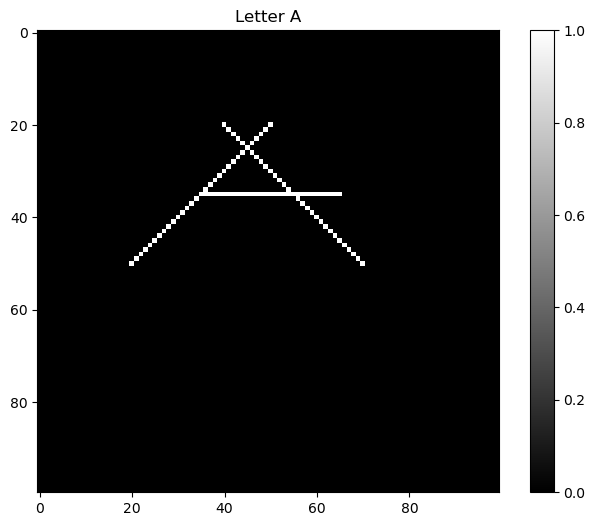

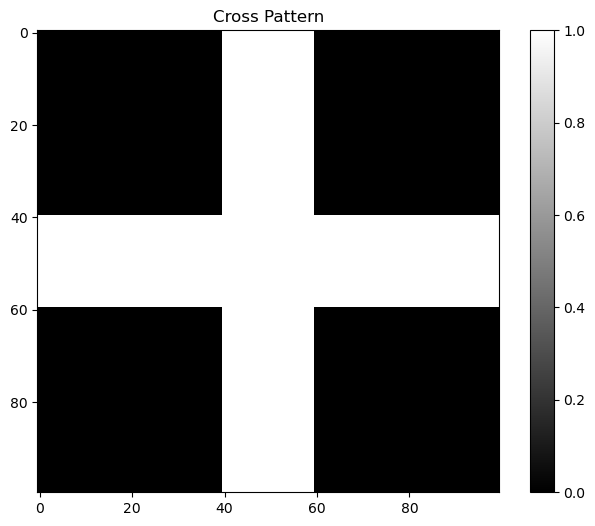

In [5]:
# Create a simple letter 'A'
image = np.zeros((100, 100))

# Draw lines to form letter A
for i in range(20, 80):
    # Left diagonal
    if 20 <= i <= 50:
        image[i, 50-i+20] = 1.0
    # Right diagonal  
    if 20 <= i <= 50:
        image[i, i+20] = 1.0
    # Horizontal line
    if 35 <= i <= 65:
        image[35, i] = 1.0

plt.figure(figsize=(8, 6))
plt.imshow(image, cmap='gray')
plt.title('Letter A')
plt.colorbar()
plt.show()

# Create a simple cross pattern
cross = np.zeros((100, 100))
cross[40:60, :] = 1.0  # Horizontal line
cross[:, 40:60] = 1.0  # Vertical line

plt.figure(figsize=(8, 6))
plt.imshow(cross, cmap='gray')
plt.title('Cross Pattern')
plt.colorbar()
plt.show()

## 5. Load Real Images

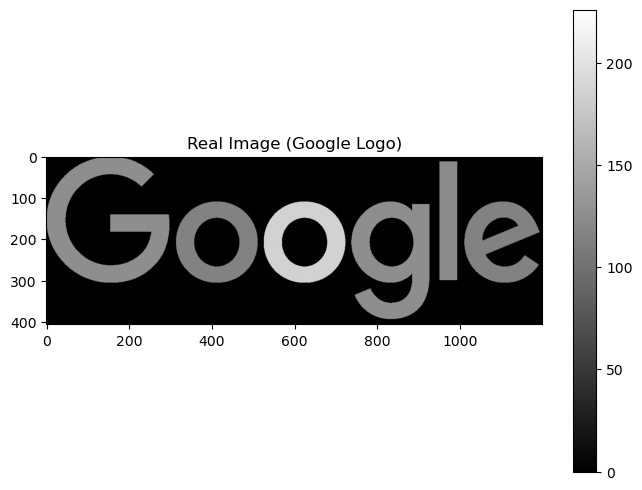

In [6]:
# Load a real image from URL
try:
    url = "https://upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Google_2015_logo.svg/1200px-Google_2015_logo.svg.png"
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    image = np.array(image.convert('L'))  # Convert to grayscale
    
    plt.figure(figsize=(8, 6))
    plt.imshow(image, cmap='gray')
    plt.title('Real Image (Google Logo)')
    plt.colorbar()
    plt.show()
except:
    print("Could not load image from URL. Creating a simple test image instead.")
    # Create a simple test image if URL fails
    test_image = np.zeros((100, 100))
    test_image[20:80, 20:80] = 1.0
    
    plt.figure(figsize=(8, 6))
    plt.imshow(test_image, cmap='gray')
    plt.title('Test Image (Square)')
    plt.colorbar()
    plt.show()

## 6. Synthetic Data with Clear Patterns

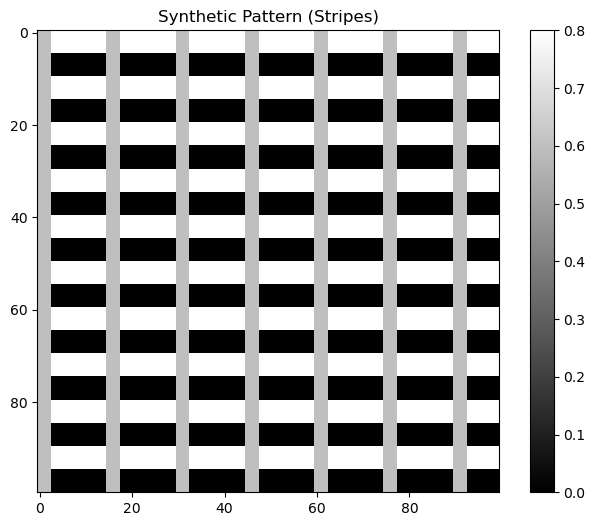

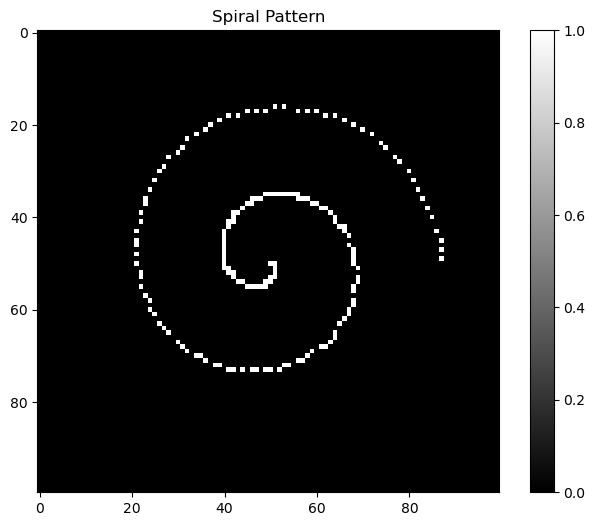

In [7]:
# Create a synthetic image with clear patterns
image = np.zeros((100, 100))

# Add horizontal stripes
for i in range(0, 100, 10):
    image[i:i+5, :] = 0.8

# Add vertical stripes
for j in range(0, 100, 15):
    image[:, j:j+3] = 0.6

plt.figure(figsize=(8, 6))
plt.imshow(image, cmap='gray')
plt.title('Synthetic Pattern (Stripes)')
plt.colorbar()
plt.show()

# Create a spiral pattern
spiral = np.zeros((100, 100))
center_y, center_x = 50, 50
for angle in np.linspace(0, 4*np.pi, 200):
    radius = angle * 3
    x = int(center_x + radius * np.cos(angle))
    y = int(center_y + radius * np.sin(angle))
    if 0 <= x < 100 and 0 <= y < 100:
        spiral[y, x] = 1.0

plt.figure(figsize=(8, 6))
plt.imshow(spiral, cmap='gray')
plt.title('Spiral Pattern')
plt.colorbar()
plt.show()

## 7. For Diffusion Models (Common Use Case)

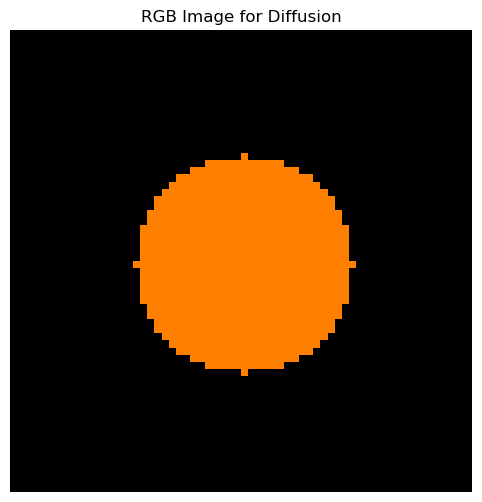

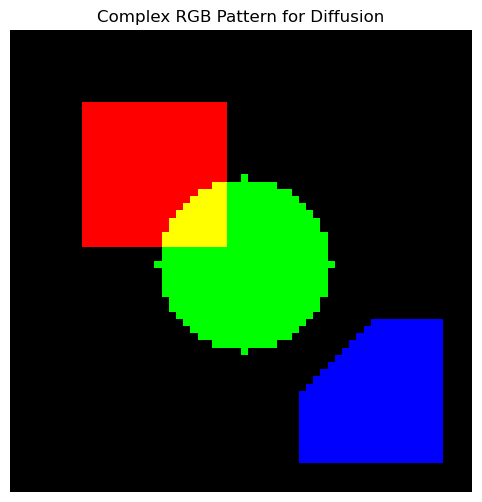

In [8]:
# Create a simple starting image for diffusion
image = np.zeros((64, 64, 3))  # RGB image

# Add a colored circle
y, x = np.ogrid[:64, :64]
center_y, center_x = 32, 32
radius = 15
circle = (x - center_x)**2 + (y - center_y)**2 <= radius**2

image[circle, 0] = 1.0  # Red channel
image[circle, 1] = 0.5  # Green channel
image[circle, 2] = 0.0  # Blue channel

plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.title('RGB Image for Diffusion')
plt.axis('off')
plt.show()

# Create a more complex RGB pattern
complex_image = np.zeros((64, 64, 3))

# Red square in top-left
complex_image[10:30, 10:30, 0] = 1.0

# Green circle in center
y, x = np.ogrid[:64, :64]
center_y, center_x = 32, 32
radius = 12
circle = (x - center_x)**2 + (y - center_y)**2 <= radius**2
complex_image[circle, 1] = 1.0

# Blue triangle in bottom-right
for i in range(40, 60):
    for j in range(40, 60):
        if i + j >= 90:  # Triangle condition
            complex_image[i, j, 2] = 1.0

plt.figure(figsize=(8, 6))
plt.imshow(complex_image)
plt.title('Complex RGB Pattern for Diffusion')
plt.axis('off')
plt.show()

## 8. Comparison: Random vs Clear Images

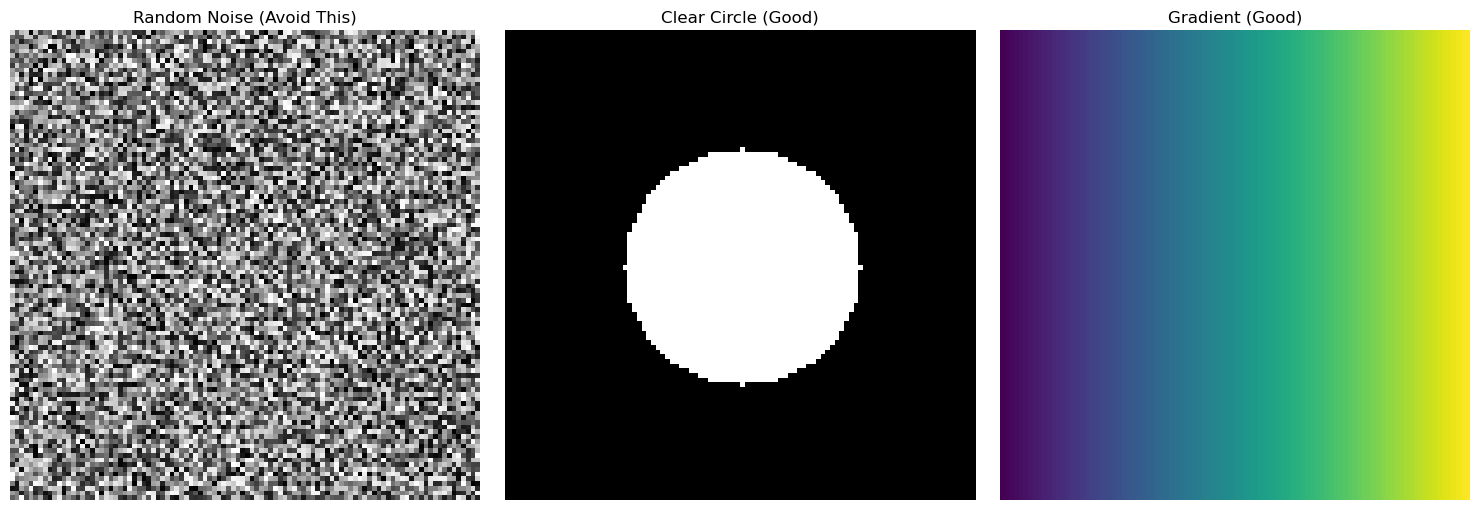

Comparison Summary:
- Random noise: Unstructured, noisy, hard to work with
- Clear images: Structured, meaningful, good for processing


In [9]:
# Compare random noise vs clear images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Random noise (what you want to avoid)
random_image = np.random.rand(100, 100)
axes[0].imshow(random_image, cmap='gray')
axes[0].set_title('Random Noise (Avoid This)')
axes[0].axis('off')

# Clear geometric shape
clear_image = np.zeros((100, 100))
y, x = np.ogrid[:100, :100]
center_y, center_x = 50, 50
radius = 25
circle = (x - center_x)**2 + (y - center_y)**2 <= radius**2
clear_image[circle] = 1.0
axes[1].imshow(clear_image, cmap='gray')
axes[1].set_title('Clear Circle (Good)')
axes[1].axis('off')

# Gradient image
gradient = np.linspace(0, 1, 100).reshape(1, -1)
gradient = np.repeat(gradient, 100, axis=0)
axes[2].imshow(gradient, cmap='viridis')
axes[2].set_title('Gradient (Good)')
axes[2].axis('off')

plt.tight_layout()
plt.show()

print("Comparison Summary:")
print("- Random noise: Unstructured, noisy, hard to work with")
print("- Clear images: Structured, meaningful, good for processing")

## Summary

Instead of using `np.random.rand()` which creates noisy images, use these methods to create clear, structured images:

1. **Geometric shapes**: Circles, rectangles, lines
2. **Gradients**: Linear, radial, or complex gradients
3. **Patterns**: Checkerboard, stripes, spirals
4. **Text/Letters**: Simple character patterns
5. **Real images**: Load from files or URLs
6. **RGB images**: For color processing
7. **Synthetic patterns**: Custom structured data

These clear images are much better for:
- Testing image processing algorithms
- Training machine learning models
- Diffusion model experiments
- Computer vision research